# Data description
The dataset is the "Palmer Penguins" dataset, which contains physical measurements of penguins from three species (Adelie, Chinstrap, and Gentoo) and three islands in Antarctica. It includes:
- bill_length_mm: Length of the penguin's bill in millimeters.
- bill_depth_mm: Depth of the penguin's bill in millimeters.
- flipper_length_mm: Length of the penguin's flipper in millimeters.
- body_mass_g: Body mass of the penguin in grams.
- species: The species of the penguin.
- island: The island where the penguin was observed.
- sex: The biological sex of the penguin.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.linear_model import LinearRegression
from sklearn.metrics import silhouette_score

In [2]:

url = "https://raw.githubusercontent.com/mwaskom/seaborn-data/master/penguins.csv"
data = pd.read_csv(url)

data.head(5)

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


In [3]:
data.dropna(inplace=True)  
data = pd.get_dummies(data, columns=['species', 'island', 'sex'], drop_first=True)

features = ['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']
X = data[features]

kmeans = KMeans(n_clusters=3, random_state=42)
data['cluster'] = kmeans.fit_predict(X)

c:\Users\jon\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


In [4]:
data.head(5)

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,species_Chinstrap,species_Gentoo,island_Dream,island_Torgersen,sex_MALE,cluster
0,39.1,18.7,181.0,3750.0,False,False,False,True,True,0
1,39.5,17.4,186.0,3800.0,False,False,False,True,False,0
2,40.3,18.0,195.0,3250.0,False,False,False,True,False,0
4,36.7,19.3,193.0,3450.0,False,False,False,True,False,0
5,39.3,20.6,190.0,3650.0,False,False,False,True,True,0


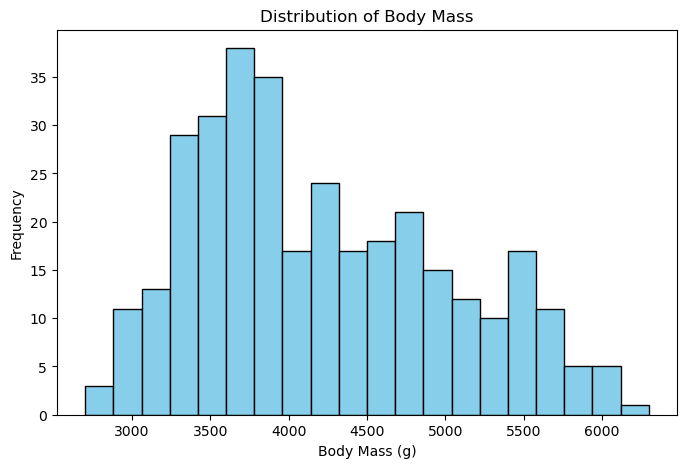

In [5]:
# Plot 1: Histogram of a feature
plt.figure(figsize=(8, 5))
plt.hist(data['body_mass_g'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Body Mass')
plt.xlabel('Body Mass (g)')
plt.ylabel('Frequency')
plt.savefig('histogram_body_mass.png')
plt.show()

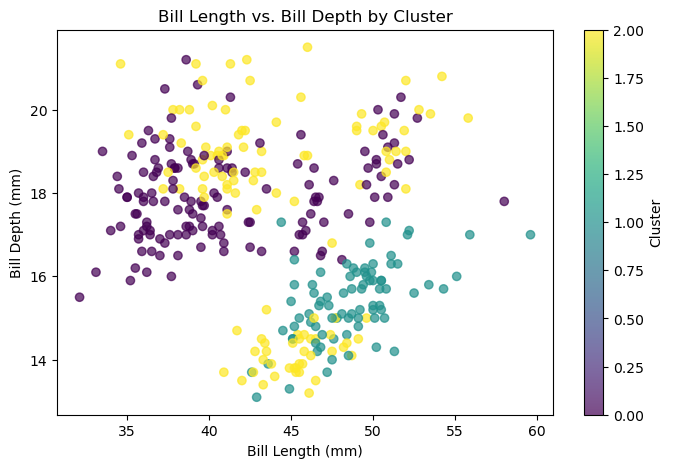

In [6]:
# Plot 2: Scatter plot of two features
plt.figure(figsize=(8, 5))
plt.scatter(data['bill_length_mm'], data['bill_depth_mm'], c=data['cluster'], cmap='viridis', alpha=0.7)
plt.title('Bill Length vs. Bill Depth by Cluster')
plt.xlabel('Bill Length (mm)')
plt.ylabel('Bill Depth (mm)')
plt.colorbar(label='Cluster')
plt.savefig('scatter_bill_length_depth.png')
plt.show()

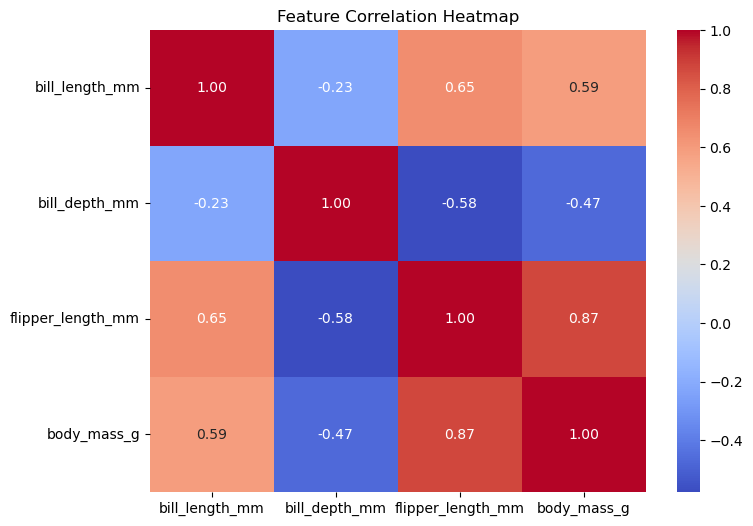

In [7]:
# Plot 3: Heatmap of feature correlations
correlation_matrix = X.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Feature Correlation Heatmap')
plt.savefig('heatmap_correlations.png')
plt.show()

c:\Users\jon\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
c:\Users\jon\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
c:\Users\jon\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
c:\Users\jon\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with M

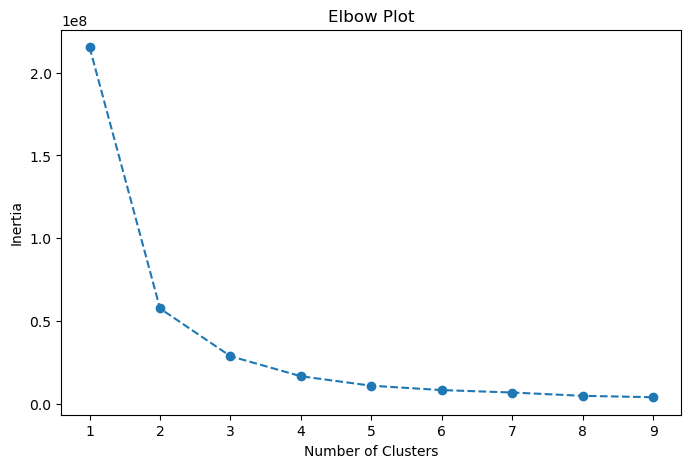

In [8]:
# Plot 4: Elbow plot for k-means clustering
inertia = []
k_range = range(1, 10)
for k in k_range:
    kmeans_temp = KMeans(n_clusters=k, random_state=42)
    kmeans_temp.fit(X)
    inertia.append(kmeans_temp.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(k_range, inertia, marker='o', linestyle='--')
plt.title('Elbow Plot')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.savefig('elbow_plot.png')
plt.show()

In [9]:

# Fitting a linear regression model
X_reg = data[['bill_length_mm']] 
y_reg = data['body_mass_g']       

reg_model = LinearRegression()
reg_model.fit(X_reg, y_reg)

data['predicted_body_mass'] = reg_model.predict(X_reg)

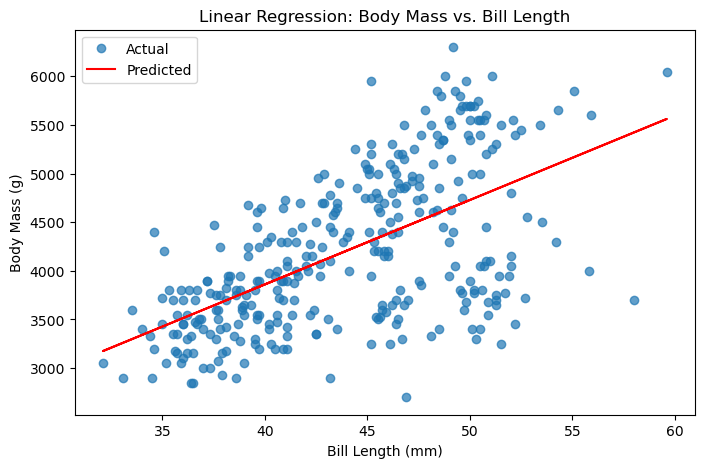

In [10]:
# Line plot of actual vs. predicted values
plt.figure(figsize=(8, 5))
plt.plot(data['bill_length_mm'], y_reg, 'o', label='Actual', alpha=0.7)
plt.plot(data['bill_length_mm'], data['predicted_body_mass'], 'r-', label='Predicted')
plt.title('Linear Regression: Body Mass vs. Bill Length')
plt.xlabel('Bill Length (mm)')
plt.ylabel('Body Mass (g)')
plt.legend()
plt.savefig('linear_regression_plot.png')
plt.show()

In [ ]:
# Calculate silhouette score 
sil_score = silhouette_score(X, data['cluster'])
print(f'Silhouette Score for k=3: {sil_score:.2f}')


Silhouette Score for k=3: 0.56
